In [ ]:
pip install tensorflow

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import joblib
from matplotlib import pyplot as plt

# Reading the dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [4]:
label = ['condition']
features = ['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF']

## Standardising the features

In [5]:
scaler = StandardScaler()
scaler.fit(df[features])
df[features] = scaler.transform(df[features])


In [6]:
X = df[features].values
y = df[label].values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)

In [8]:
# Convert labels to categorical for classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Reshaping input data for Conv1D (CNN requires 3D input: samples, timesteps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

## Define the CNN + LSTM + GRU model

In [ ]:
model = Sequential()

In [11]:
# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

C:\Users\tanvi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# LSTM layer
model.add(LSTM(50, return_sequences=True, activation='tanh'))
model.add(Dropout(0.5))

In [13]:
# GRU layer
model.add(GRU(50, activation='tanh'))
model.add(Dropout(0.5))

In [14]:
# Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [15]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6024 - loss: 0.8666 - val_accuracy: 0.6251 - val_loss: 0.9125
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7852 - loss: 0.5235 - val_accuracy: 0.7685 - val_loss: 0.5399
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8341 - loss: 0.4091 - val_accuracy: 0.8818 - val_loss: 0.3037
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8640 - loss: 0.3378 - val_accuracy: 0.9069 - val_loss: 0.2365
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8811 - loss: 0.2965 - val_accuracy: 0.9211 - val_loss: 0.1965
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8943 - loss: 0.2648 - val_accuracy: 0.9306 - val_loss: 0.1777
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9053 - loss: 0.2387 - val_accuracy: 0.9291 - val_loss: 0.1694
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9120 - loss: 0.2194 - val_acc

## Plot the training history

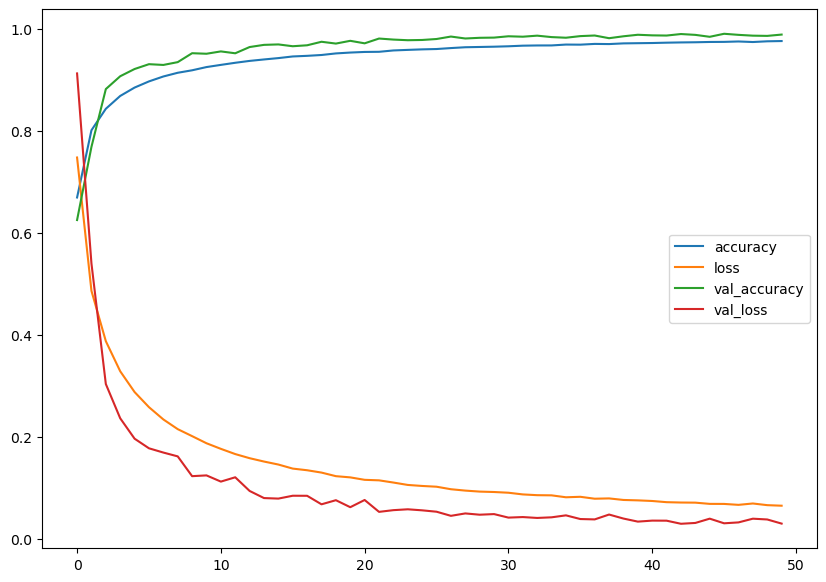

In [17]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.show()

## Testing on test set

In [18]:
df_test = pd.read_csv('test.csv')
df_test[features] = scaler.transform(df_test[features])
X = np.expand_dims(df_test[features].values, axis=2)
y = df_test[label].values
y = to_categorical(y)

## Evaluate the model

In [19]:
loss, acc = model.evaluate(X, y, verbose=1)
print(f'Test accuracy: {acc:.4f}')

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9892 - loss: 0.0290
Test accuracy: 0.9885


# Final Pipeline for prediction

In [20]:
data = pd.read_csv('test.csv')
t = scaler.transform(data[features].iloc[5545].values.reshape(1, -1))
t = np.expand_dims(t, axis=2)  # Reshape for CNN input
y_pred = model.predict(t)
print(np.argmax(y_pred[0]))
print(data[label].iloc[5545])

C:\Users\tanvi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
0
condition    0
Name: 5545, dtype: int64


# Saving models

In [21]:
# Save the trained model and scaler for future use
model.save('tfmodel_cnn_lstm_gru.h5')
joblib.dump(scaler, 'scaler.joblib', compress=9)

['scaler.joblib']